<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/CNN_on_fashion_mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
#from keras.optimizers import rmsprop, Adam
from keras.utils import to_categorical

%matplotlib inline

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [ ]:
print(keras.__version__)

2.4.3


In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


0


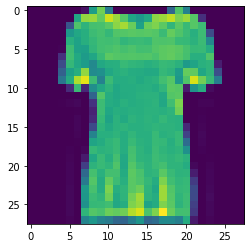

In [ ]:
plt.imshow(train_X[10])
print(train_Y[10])

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

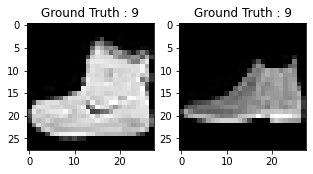

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
import keras
import keras.models as models

In [ ]:
train_X.shape[1:]

(28, 28, 1)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28, 28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))


In [ ]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))


In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [ ]:
model_train=model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 85s 112ms/step - loss: 0.6945 - accuracy: 0.7453 - val_loss: 0.3342 - val_accuracy: 0.8813
Epoch 2/20
750/750 [==============================] - 84s 112ms/step - loss: 0.2889 - accuracy: 0.8946 - val_loss: 0.2625 - val_accuracy: 0.9064
Epoch 3/20
750/750 [==============================] - 84s 112ms/step - loss: 0.2400 - accuracy: 0.9127 - val_loss: 0.2386 - val_accuracy: 0.9105
Epoch 4/20
750/750 [==============================] - 84s 112ms/step - loss: 0.2065 - accuracy: 0.9242 - val_loss: 0.2482 - val_accuracy: 0.9116
Epoch 5/20
750/750 [==============================] - 84s 112ms/step - loss: 0.1796 - accuracy: 0.9331 - val_loss: 0.2332 - val_accuracy: 0.9142
Epoch 6/20
750/750 [==============================] - 84s 112ms/step - loss: 0.1546 - accuracy: 0.9420 - val_loss: 0.2162 - val_accuracy: 0.9233
Epoch 7/20
750/750 [==============================] - 84s 112ms/step - loss: 0.1320 - accuracy: 0.9503 - val_loss: 0.2440 - val_ac

In [ ]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.504413902759552
Test accuracy: 0.9160000085830688


In [ ]:
model_train.history

{'accuracy': [0.8297500014305115,
  0.8971666693687439,
  0.9129166603088379,
  0.9240624904632568,
  0.9322291612625122,
  0.9419166445732117,
  0.9481874704360962,
  0.9557708501815796,
  0.9620000123977661,
  0.9672291874885559,
  0.9721249938011169,
  0.9765625,
  0.9804166555404663,
  0.9830833077430725,
  0.984541654586792,
  0.9836666584014893,
  0.9867083430290222,
  0.9871875047683716,
  0.9879791736602783,
  0.9890000224113464],
 'loss': [0.4689140319824219,
  0.28244006633758545,
  0.23673315346240997,
  0.20610250532627106,
  0.18004769086837769,
  0.1557571142911911,
  0.1361820101737976,
  0.11710382997989655,
  0.10062021017074585,
  0.08530933409929276,
  0.07381764054298401,
  0.06206976994872093,
  0.05188076198101044,
  0.04646473750472069,
  0.042264070361852646,
  0.04338633269071579,
  0.03646472096443176,
  0.03452564403414726,
  0.03269040584564209,
  0.029320642352104187],
 'val_accuracy': [0.8812500238418579,
  0.906416654586792,
  0.9104999899864197,
  0.9115

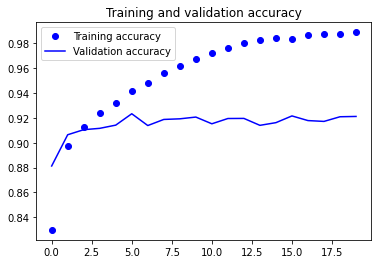

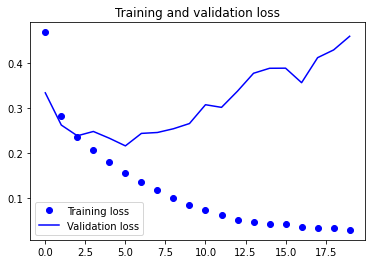

In [ ]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
fashion_model = tf.keras.Sequential()
fashion_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.4))
fashion_model.add(tf.keras.layers.Flatten())
fashion_model.add(tf.keras.layers.Dense(128, activation='linear'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))           
fashion_model.add(tf.keras.layers.Dropout(0.3))
fashion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 90s 120ms/step - loss: 0.8470 - accuracy: 0.6836 - val_loss: 0.3779 - val_accuracy: 0.8622
Epoch 2/20
750/750 [==============================] - 89s 119ms/step - loss: 0.3880 - accuracy: 0.8580 - val_loss: 0.3154 - val_accuracy: 0.8851
Epoch 3/20
750/750 [==============================] - 90s 120ms/step - loss: 0.3268 - accuracy: 0.8792 - val_loss: 0.2979 - val_accuracy: 0.8893
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2972 - accuracy: 0.8883 - val_loss: 0.2728 - val_accuracy: 0.8987
Epoch 5/20
750/750 [==============================] - 90s 119ms/step - loss: 0.2806 - accuracy: 0.8960 - val_loss: 0.2423 - val_accuracy: 0.9092
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 0.2654 - accuracy: 0.9014 - val_loss: 0.2349 - val_accuracy: 0.9136
Epoch 7/20
750/750 [==============================] - 89s 119ms/step - loss: 0.2574 - accuracy: 0.9040 - val_loss: 0.2374 - val_ac

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 [==============================] - 6s 18ms/step - loss: 0.2267 - accuracy: 0.9196


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22674678266048431
Test accuracy: 0.9196000099182129


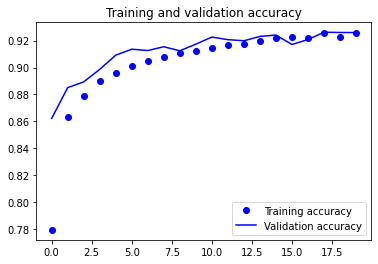

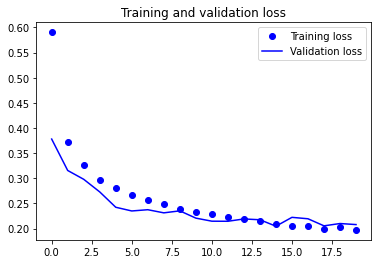

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = fashion_model.predict(test_X)


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


Found 9162 correct labels


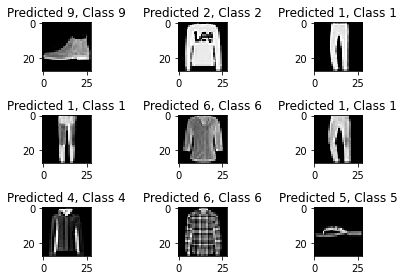

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 838 incorrect labels


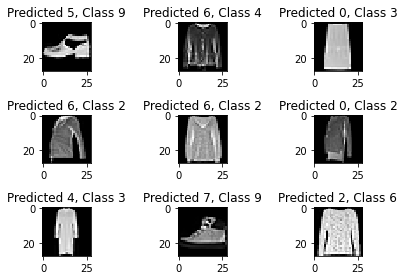

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.87      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.85      0.88      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.85      0.90      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.78      0.73      0.75      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

